In [1]:
import decimal
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit


En primer lugar, procederemos a leer los datos del fichero\footnote{Esta práctica se realizará usando Python 3.7. En el directorio de github se acompaña el código en python así como un fichero de Jupyter notebook}. En este paso convertiremos los datos en un data frame, para que sea más cómodo trabajar con ellos. Para ello, tenemos que solucionar el problema de que hay filas con más campos, debido a que el campo ``Finish'' puede tener el caracter ``,'', y al leer el fichero se interpreta como dos campos independientes.

In [2]:
# Abrimos el fichero con los datos
file = open('datos_F1_1950_2018_prac2.csv', 'r', encoding="utf-16")

# Leemos el fichero
data = file.readlines()

#>Cerramos el fichero
file.close()

# Eliminamos los caracteres de saltos de línea y dividimos por ","
data = [(d.strip('\n')).split(',') for d in data]

# Corregimos aquellas filas en las que hay una "," en el campo Finish
for d in data:
    if len(d) > 10:
        d[8] = d[8] + ':' + d[9]
        d.pop(9)

# Convertimos los datos en Data Frame
df_data = pd.DataFrame.from_records(data[1:], columns=data[0])

# Lo mostramos en pantalla
df_data
#set(list(df_data['GP']))

,# Year,GP,Driver,Number,Team,Grid position,Final position,Points,Finish,Laps
0,1950,great britain,Nino Farina,2,Alfa Romeo,1,1,9,02:13:23.600,70
1,1950,great britain,Luigi Fagioli,3,Alfa Romeo,2,2,6,02:13:26.200,70
2,1950,great britain,Reg Parnell,4,Alfa Romeo,4,3,4,02:14:15.600,70
3,1950,great britain,Yves Giraud Cabantous,14,Talbot-Lago,6,4,3,+2 laps,68
4,1950,great britain,Louis Rosier,15,Talbot-Lago,9,5,2,+2 laps,68
5,1950,great britain,Bob Gerard,12,ERA,13,6,0,+3 laps,67
6,1950,great britain,Cuth Harrison,11,ERA,15,7,0,+3 laps,67
7,1950,great britain,Philippe Ã‰tancelin,16,Talbot-Lago,14,8,0,+5 laps,65
8,1950,great britain,David Hampshire,6,Maserati,16,9,0,+6 laps,64
9,1950,great britain,Joe Fry Brian Shawe Taylor,10,Maserati,2020,10,00,+6 laps,3232


In [3]:
LW = [d[0] == 'Lewis Hamilton' for d in df_data['Driver']]
#print(df_data['Driver'][LW])
puntos = [int(p[0]) for p in df_data['Points'][LW]]

for y in range(2000, 2019):
    dummy = df_data['# Year'] == str(y)
    print(y, (set(list(df_data['GP'][dummy]))))

2000 {'san marino', 'france', 'malaysia', 'hungary', 'italy', 'spain', 'australia', 'great britain', 'brazil', 'germany', 'europe', 'austria', 'belgium', 'japan', 'monaco', 'canada'}
2001 {'the united states', 'san marino', 'malaysia', 'france', 'hungary', 'italy', 'spain', 'australia', 'brazil', 'great britain', 'belgium', 'austria', 'europe', 'japan', 'monaco', 'canada'}
2002 {'the united states', 'san marino', 'malaysia', 'france', 'hungary', 'italy', 'spain', 'australia', 'brazil', 'great britain', 'germany', 'austria', 'europe', 'belgium', 'japan', 'monaco', 'canada'}
2003 {'the united states', 'san marino', 'malaysia', 'france', 'hungary', 'italy', 'spain', 'australia', 'brazil', 'great britain', 'germany', 'austria', 'europe', 'japan', 'monaco', 'canada'}
2004 {'china', 'the united states', 'san marino', 'malaysia', 'france', 'hungary', 'italy', 'spain', 'australia', 'great britain', 'germany', 'belgium', 'europe', 'brazil', 'bahrain', 'japan', 'monaco', 'canada'}
2005 {'china',

In [4]:
# Eliminamos los caracteres erróneos
for j in range(len(df_data)):
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã‰', 'É')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã¨', 'è')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã©', 'é')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã¡', 'á')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã ', 'á')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã“', 'Ó')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã³', 'ó')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã¤', 'ä')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã¶', 'ö')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã¼', 'ü')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã­', 'í')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã§', 'ç')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã´', 'ô')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã¸', 'ø')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ãº', 'ú')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Ã±', 'ñ')
    df_data['Driver'][j] = df_data['Driver'][j].replace('Å¡', 'š')
    df_data['Driver'][j] = df_data['Driver'][j].replace('van der', 'vander')

list(set(df_data['Driver']))


['Martin Brundle',
 'Dick Gibson',
 'Franco Forini',
 'Alberto Uria Oscar González',
 'Leo Kinnunen',
 'Bruno Senna',
 'Yves Giraud Cabantous',
 'Tom Belsø',
 'Sébastien Bourdais',
 'Bill Moss',
 'Daniil Kvyat',
 'René Arnoux',
 'Mark Blundell',
 'George Fonder',
 'Josef Peters',
 'Helmut Niedermayr',
 'Peter Westbury',
 'Erwin Bauer',
 'Rob Schroeder',
 'Hideki Noda',
 'Johnny Dumfries',
 'Lloyd Ruby',
 'Pat Flaherty Jim Rathmann',
 'Niki Lauda',
 'Bob Anderson',
 'Tony Settember',
 'Mauro Baldi',
 'Mike Hawthorn José Froilán González',
 'Yuji Ide',
 'Oswald Karch',
 'Johnny Thomson',
 'Elmer George',
 'Andy Linden Chuck Stevenson Jerry Hoyt',
 'Jean-Pierre Beltoise',
 'Troy Ruttman',
 'Bill Holland',
 'Massimiliano Papis',
 'Carlo Abate',
 'Juan Jover',
 'Emilio de Villota',
 'Tim Parnell',
 'Tony Maggs',
 'Nino Vaccarella',
 'Alan Rees',
 'Vittorio Brambilla',
 'Vic Elford',
 'Jean-Louis Schlesser',
 'Gianmaria Bruni',
 'Timmy Mayer',
 'Juan Manuel Bordeu',
 'Alfonso de Portago Pete

In [5]:
# Estimamos el número de pilotos en cada campo
N_drivers = [math.floor(len(d.split())/2) for d in df_data['Driver']]

# Buscamos aquellos campos con un solo nombre
indice_1  = np.array(N_drivers)==1
drivers_list = list(set(df_data['Driver'][indice_1]))


In [6]:
drivers_list.append('Joie Chitwood')
drivers_list.append('Dries van der Lof')
drivers_list.append('Bill Cantrell')
drivers_list.append('Bayliss Levrett')
drivers_list.append('Hernando da Silva Ramos')
drivers_list.append('Carel Godin de Beaufort')
drivers_list.append('Maria Teresa de Filippis')
drivers_list.append('Mario de Araujo Cabral')
drivers_list.append('Syd van der Vyver')
drivers_list.append('Pedro de la Rosa')
drivers_list.append('Giedo van der Garde')
drivers_list.append('Eric van de Poele')
drivers_list.append('Joe Fry')
drivers_list.append('Brian Shawe Taylor')
drivers_list.append('Dorino Serafini')
drivers_list.append('Alberto Ascari')
drivers_list.append('Johnny Mantz')
drivers_list.append('Walt Faulkner')
drivers_list.append('Frank Armi')
drivers_list.append('George Fonder')
drivers_list.append('Danny Kladis')
drivers_list.append('Spider Webb')
drivers_list.append('Len Duncan')
drivers_list.append('George Fonder')
drivers_list.append('Charles Pozzi')
drivers_list.append('Alberto Uria')
drivers_list.append('Oscar González')
drivers_list.append('Mike MacDowel')

In [7]:
print(sorted(drivers_list))

['A.J. Foyt', 'Adolf Brudes', 'Adolfo Schewelm Cruz', 'Adrian Sutil', 'Adrián Campos', 'Aguri Suzuki', 'Al Herman', 'Al Keller', 'Al Pease', 'Alain Prost', 'Alain de Changy', 'Alan Brown', 'Alan Jones', 'Alan Rees', 'Alan Rollinson', 'Alan Stacey', 'Albert Scherrer', 'Alberto Ascari', 'Alberto Ascari', 'Alberto Colombo', 'Alberto Rodriguez Larreta', 'Alberto Uria', 'Alberto Uria', 'Aldo Gordini', 'Alessandro Nannini', 'Alessandro Pesenti-Rossi', 'Alessandro Zanardi', 'Alessandro de Tomaso', 'Alex Blignaut', 'Alex Caffi', 'Alex Ribeiro', 'Alex Soler-Roig', 'Alex Yoong', 'Alexander Rossi', 'Alexander Wurz', 'Alfonso de Portago', 'Alfredo Pián', 'Allan McNish', 'Allen Berg', 'Andre Lotterer', 'Andrea Chiesa', 'Andrea Montermini', 'Andrea de Adamich', 'Andrea de Cesaris', 'André Guelfi', 'André Milhoux', 'André Pilette', 'André Simon', 'André Testut', 'Andy Linden', 'Anthony Davidson', 'Antonio Creus', 'Antonio Giovinazzi', 'Antônio Pizzonia', 'Archie Scott Brown', 'Art Bisch', 'Art Cross'

In [8]:
# Creamos una lista donde almacenar el resultado
sep_drivers = []

# Para cada registro...
for i in range(len(df_data['Driver'])):
    # Definimos una variable para simplificar el código
    d = df_data['Driver'][i]

    # Variable auxiliar donde almacenamos la posición
    # inicial del nombre de los pilotos
    limits = []
    
    # Para cada nombre en la lista...
    for dr in drivers_list:
        # Comprobamos si el nombre está en el registro
        if dr in d:
            # En caso afirmativo, lo almacenamos
            limits.append(d.find(dr))

    # Ordenamos las posiciones de forma ascendente
    limits = sorted(limits)
    # Y añadimos la longitud de la cadena
    limits.append(len(d))
    
    # Creamos una variable para almacenar los resultados parciales
    dummy = []
    # Extraemos los nombres del campo del registro 
    for j in range(len(limits)-1):
        dummy.append(d[limits[j]:limits[j+1]].strip(' '))
    
    # Limpiamos los resultados
    dummy = [st for st in dummy if st != '']
    
    # Y los añadimos a la variable creada para ello
    sep_drivers.append(dummy)

In [9]:
# Creamos una variable para almacenar los pilotos que faltan en la lista
missing = []

# Para cada registro...
for i in range(len(df_data['Driver'])):
    # Comparamos la longitud del campo original con la 
    # suma de las longitudes de los nombres separados
    if len(' '.join(sep_drivers[i])) != len(df_data['Driver'][i]):
        # Si son diferentes, añadimos el registro a la variable
        missing.append(df_data['Driver'][i])

# Mostramos en pantalla los pilotos que faltan
print(list(set(missing)))

#[s_d == [] for s_d in sep_drivers]
#print(df_data['Driver'][indices])


[]


In [10]:
df_data['Driver'] = sep_drivers

In [11]:

# Identificamos el número de pilotos en cada registro
n_items = [len(d) for d in df_data['Driver']]

# Creamos unas variables que almacenan los datos que nos interesan
Laps = []
Grid = []
Points = []

# Para cada registro
for i in range(len(n_items)):
    # Atributo "Laps"
    # Determinamos la longitud del atributo para cada piloto
    n=int(len(df_data['Laps'][i])/n_items[i])
    # Dividimos la cadena de texto en subcadenas de la longitud calculada
    dummy_1 = [df_data['Laps'][i][j * n:(j + 1) * n] for j in range((len(df_data['Laps'][i]) + n - 1) // n )]
    # Almacenamos el resultado
    Laps.append(dummy_1)

    # Atributo "Grid Position"
    # Determinamos la longitud del atributo para cada piloto
    n=int(len(df_data['Grid position'][i])/n_items[i])
    # Si el atributo está vacío
    if (len(df_data['Grid position'][i]) == 0):
        # Lo cambiamos por la palabra "Pitlane"
        dummy_2 = [np.nan] * n_items[i]
    # Si el atributo tiene una longitud menor que el número de pilotos
    elif (len(df_data['Grid position'][i]) < n_items[i]):
        # Suponemos que el atributo aplica a todos ellos
        dummy_2 = [df_data['Grid position'][i]] * n_items[i]
    # En otro caso
    else:
        # Dividimos la cadena de texto en subcadenas de la longitud calculada
        dummy_2 = [df_data['Grid position'][i][j * n:(j + 1) * n] for j in range((len(df_data['Grid position'][i]) + n - 1) // n )]
    # Almacenamos el resultado
    Grid.append(dummy_2)
    
    # Atributo "Points"
    # Determinamos la longitud del atributo para cada piloto
    n=int(len(df_data['Points'][i])/n_items[i])
    # Si el atributo está vacío
    if (df_data['Points'][i] == ''):
        # Lo cambiamos por el valor "0"
        dummy_3 = [0] * n_items[i]
    # Si el atributo tiene una longitud menor que el número de pilotos
    elif (len(df_data['Points'][i]) < n_items[i]):
        # Suponemos que el atributo aplica a todos ellos
        dummy_3 = df_data['Points'][i] * n_items[i]
    # En otro caso
    else:
        # Dividimos la cadena de texto en subcadenas de la longitud calculada
        dummy_3 = [df_data['Points'][i][j * n:(j + 1) * n] for j in range((len(df_data['Points'][i]) + n - 1) // n )]
    # Almacenamos el resultado
    Points.append(dummy_3)

# Sustituimos las columnas en el data frame por las nuevas columnas
df_data['Laps'] = Laps
df_data['Grid position'] = Grid
df_data['Points'] = Points


In [12]:
df_data['GP'] = [d.replace('indianapolis 500', 'Indianapolis 500') for d in df_data['GP']]
df_data['GP'] = [d.replace('australian', 'australia') for d in df_data['GP']]
df_data['GP'] = [d.replace('austrian', 'austria') for d in df_data['GP']]
df_data['GP'] = [d.replace('belgian', 'belgium') for d in df_data['GP']]
df_data['GP'] = [d.replace('brazilian', 'brazil') for d in df_data['GP']]
df_data['GP'] = [d.replace('british', 'great britain') for d in df_data['GP']]
df_data['GP'] = [d.replace('canadian', 'canada') for d in df_data['GP']]
df_data['GP'] = [d.replace('caesars palace', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('chinese', 'china') for d in df_data['GP']]
df_data['GP'] = [d.replace('dallas', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('detroit', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('european', 'europe') for d in df_data['GP']]
df_data['GP'] = [d.replace('french', 'france') for d in df_data['GP']]
df_data['GP'] = [d.replace('german f1', 'germany') for d in df_data['GP']]
df_data['GP'] = [d.replace('germanyy', 'german') for d in df_data['GP']]
df_data['GP'] = [d.replace('hungarian', 'hungary') for d in df_data['GP']]
df_data['GP'] = [d.replace('indian', 'india') for d in df_data['GP']]
df_data['GP'] = [d.replace('italian', 'italy') for d in df_data['GP']]
df_data['GP'] = [d.replace('japanese', 'japan') for d in df_data['GP']]
df_data['GP'] = [d.replace('the pacific', 'japan') for d in df_data['GP']]
df_data['GP'] = [d.replace('korean', 'korea') for d in df_data['GP']]
df_data['GP'] = [d.replace('malaysian', 'malaysia') for d in df_data['GP']]
df_data['GP'] = [d.replace('mexican', 'mexico') for d in df_data['GP']]
df_data['GP'] = [d.replace('pescara', 'italy') for d in df_data['GP']]
df_data['GP'] = [d.replace('russian', 'russia') for d in df_data['GP']]
df_data['GP'] = [d.replace('spanish', 'spain') for d in df_data['GP']]
df_data['GP'] = [d.replace('the netherland', 'the netherlands') for d in df_data['GP']]
df_data['GP'] = [d.replace('the netherlandss', 'the netherlands') for d in df_data['GP']]
df_data['GP'] = [d.replace('the united states west', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('the united states', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('united states', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('us f1', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace('usa f1', 'u.s.a.') for d in df_data['GP']]
df_data['GP'] = [d.replace(' gp', '') for d in df_data['GP']]
df_data['GP'] = [d.replace(' f1', '') for d in df_data['GP']]

for i in range(len(df_data)):
    df_data['GP'][i] = df_data['GP'][i].title()
    
set(list(df_data['GP']))

{'Abu Dhabi',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Britain',
 'Canada',
 'China',
 'Europe',
 'France',
 'Germany',
 'Great Britain',
 'Hungary',
 'India',
 'Indianapolis 500',
 'Italy',
 'Japan',
 'Japanse',
 'Korea',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Monaco',
 'Morocco',
 'Portugal',
 'Russia',
 'San Marino',
 'Singapore',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Turkey',
 'U.S.A.'}

In [13]:
# Creamos variables para almacenar los atributos de cada registro
Year   = []
GP     = []
Driver = []
Number = []
Team   = []
Grid   = []
Final  = []
Points = []
Finish = []
Laps   = []

# Para cada registro...
for i in range(len(df_data)):
    # Y por cada nombre en el campo "Driver"...
    for j in range(len(df_data['Driver'][i])):
        # Añadimos los atributos de cada registro 
        # a la variable corresondiente
        Year.append(int(df_data['# Year'][i]))
        GP.append(df_data['GP'][i])
        Driver.append(str(np.array(df_data['Driver'][i][j]).flatten()[0]))
        Number.append(int(df_data['Number'][i]))
        Team.append(df_data['Team'][i])
        Grid.append(float(np.array(df_data['Grid position'][i][j]).flatten()[0]))
        Final.append(int(np.array(df_data['Final position'][i]).flatten()[0]))
        Points.append(float(np.array(df_data['Points'][i][j]).flatten()[0]))
        Finish.append(df_data['Finish'][i])
        Laps.append(int(np.array(df_data['Laps'][i][j]).flatten()[0]))

# Creamos un data frame con estas variables       
df = pd.DataFrame.from_items([('Year', Year),
        ('GP', GP),
        ('Driver', Driver),
        ('Number', Number),
        ('Team', Team),
        ('Grid', Grid),
        ('Final', Final),
        ('Points', Points),
        ('Finish', Finish),
        ('Laps', Laps),
         ])

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


In [14]:
df

,Year,GP,Driver,Number,Team,Grid,Final,Points,Finish,Laps
0,1950,Great Britain,Nino Farina,2,Alfa Romeo,1.0,1,9.0,02:13:23.600,70
1,1950,Great Britain,Luigi Fagioli,3,Alfa Romeo,2.0,2,6.0,02:13:26.200,70
2,1950,Great Britain,Reg Parnell,4,Alfa Romeo,4.0,3,4.0,02:14:15.600,70
3,1950,Great Britain,Yves Giraud Cabantous,14,Talbot-Lago,6.0,4,3.0,+2 laps,68
4,1950,Great Britain,Louis Rosier,15,Talbot-Lago,9.0,5,2.0,+2 laps,68
5,1950,Great Britain,Bob Gerard,12,ERA,13.0,6,0.0,+3 laps,67
6,1950,Great Britain,Cuth Harrison,11,ERA,15.0,7,0.0,+3 laps,67
7,1950,Great Britain,Philippe Étancelin,16,Talbot-Lago,14.0,8,0.0,+5 laps,65
8,1950,Great Britain,David Hampshire,6,Maserati,16.0,9,0.0,+6 laps,64
9,1950,Great Britain,Joe Fry,10,Maserati,20.0,10,0.0,+6 laps,32


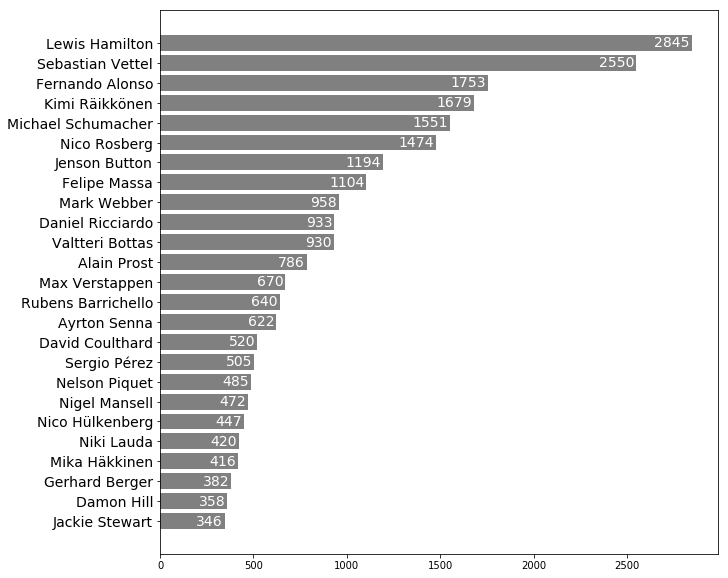

In [15]:
selection_1 = (df['Points'] >0) & (np.isfinite(df['Points']))


# creamos una lista en la que cada piloto aparezca una vez
scoring_drivers = np.array(list(set(df['Driver'][selection_1])))

# creamos una variable para almacenar los datos
drivers_score = []
# Para cada piloto...
for driver in scoring_drivers:
    # sumamos sus puntos
    dummy = np.sum(df['Points'][df['Driver']==driver])
    # y los almacenamos
    drivers_score.append(dummy)

# array con índices de ordenación
sort_ind = np.argsort(drivers_score)

# variables para el gráfico con los 25 valores de puntuación más altos
plot_score = np.array(drivers_score)[sort_ind][-25:]
plot_drivers = scoring_drivers[sort_ind][-25:]
y_pos = np.arange(1, len(plot_score)+1, 1)

# Creamos el gráfico
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.barh(y_pos, plot_score, align='center', 
         color='gray', ecolor='black')
ax1.set_yticks(np.arange(1, len(plot_score)+1, 1))
ax1.set_yticklabels(plot_drivers, fontsize=14)

for i in range(len(plot_score)):
    plt.text(plot_score[i]-10, y_pos[i]-0.2, str(int(plot_score[i])),
             horizontalalignment='right', color='w', fontsize=14)
plt.show()





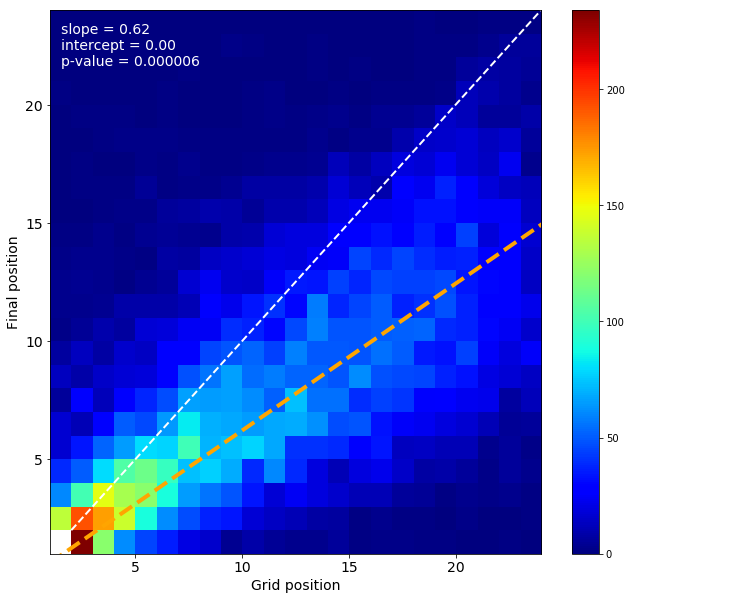

In [16]:
# Suprimimos los signos '+' del format ''+x laps'
selection_2 = [d.replace('+', '') for d in df['Finish']]
# En algunos campos aparece un signo '-', también lo quitamos
selection_2 = [d.replace('-', '') for d in selection_2]
# Miramos si el primer carácter es un dígito
selection_2 = [d[0].isdigit() for d in selection_2]
# Seleccionamos también aquellos datos no nulos en la posición de salida
selection_2 = selection_2 & (np.isfinite(df['Grid']))

# Variables para la representación gráfica con la selección de los datos
x = df['Grid'][selection_2]
y = df['Final'][selection_2]
# Calculamos un ajuste lineal 
def func(x, a):
    return x*a

dummy = np.histogram2d(x,y, bins=[32, 23], normed=False)
reg = [d>10 for d in dummy[0]]

x_fit = []
y_fit = []

for i in range(len(dummy[0])):
    for j in range(len(dummy[0][i])):
        for k in range(int(dummy[0][i][j])):
            x_fit.append(dummy[1][i])
            y_fit.append(dummy[2][j])

p0 = curve_fit(func, x_fit, y_fit)

# Representamos los puntos en escala de grises y el ajuste
fig, ax2 = plt.subplots(figsize=(11,10))
#plt.plot(x, y, 'ok', alpha=0.025)
plt.hist2d(x, y, bins=[32, 23], normed=False, cmax=400, cmap='jet')
plt.colorbar()
plt.axis([1, 24, 1, 24])
plt.plot([1, 25], [1,25], '--w', linewidth=2)
plt.plot([1, 25], [1*p0[0], 25*p0[0]], '--', color='orange', linewidth=4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Grid position', fontsize=14)
plt.ylabel('Final position', fontsize=14)
plt.text(1.5, 23.5, 'slope = ' + str("%.2f" % p0[0]) + '\n' +
         'intercept = ' + str("%.2f" % 0.00) + '\n' +
         'p-value = ' + str("%.6f" % p0[1]),
         horizontalalignment='left', verticalalignment='top',
         color='w', fontsize=14)

plt.show()